In [333]:
# Importing Libraries.
import numpy as np
import pandas as pd
import re
import os
import string
#stop = set(stopwords.words('english'))
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

import pickle
import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#print(check_output(["ls", "C:/Users/Rewati/Documents/Python Scripts"]).decode("utf8"))

In [362]:
# Sheet_1 is the responses to the therapy bot
df1 = pd.read_csv('C:/Users/Rewati/Documents/Python Scripts/Sheet_1.csv', encoding='latin-1')
# Print a good looking dataframe
df1 = df1.drop(["Unnamed: 3", "Unnamed: 4", "Unnamed: 5", "Unnamed: 6","Unnamed: 7"], axis = 1)

In [363]:
df1.head()

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [364]:
# Model Building
df1['Label'] = Encode.fit_transform(df1['class'])
df1.head()

,response_id,class,response_text,Label
0,response_1,not_flagged,I try and avoid this sort of conflict,1
1,response_2,flagged,Had a friend open up to me about his mental ad...,0
2,response_3,flagged,I saved a girl from suicide once. She was goin...,0
3,response_4,not_flagged,i cant think of one really...i think i may hav...,1
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,1


In [365]:
df1["class"].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

In [366]:
# Generate wordclouds to confirm our data is useful.

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud(dataframe):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(background_color = "white", stopwords = stopwords).generate(" ".join([i for i in dataframe.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("bag_composition")

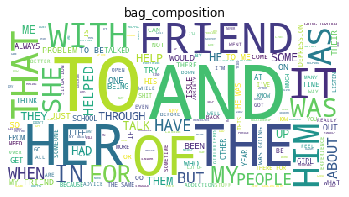

In [367]:
wordcloud(df1['response_text'])

In [368]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

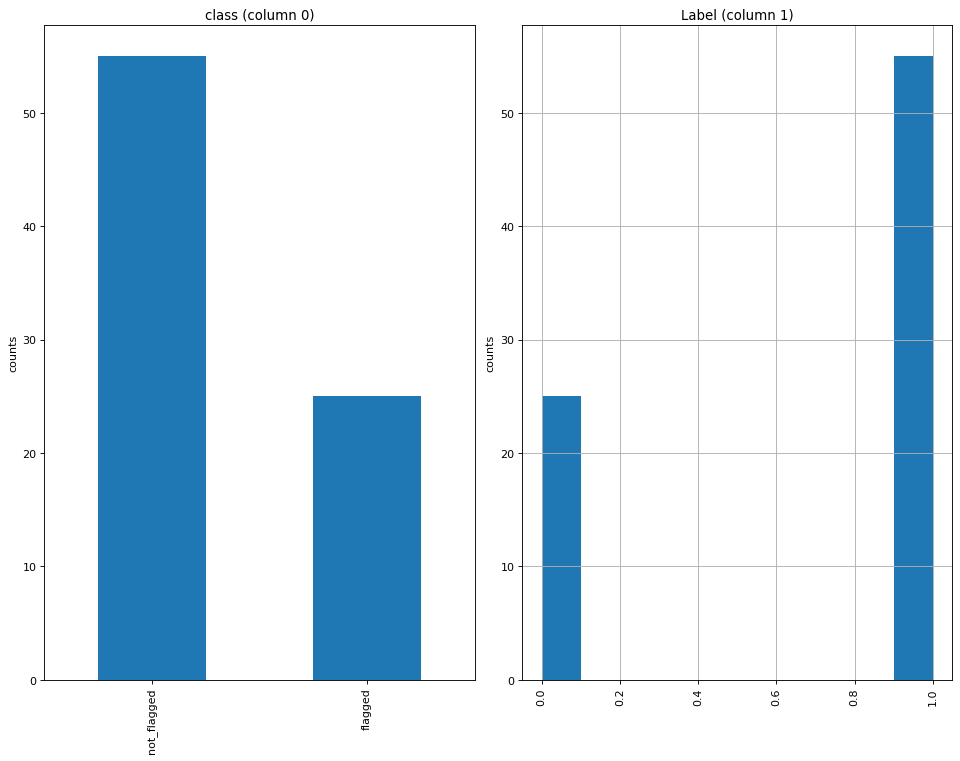

In [369]:
plotPerColumnDistribution(df1, 10, 5)

In [370]:
df1_Text = df1["response_text"]
len(df1_Text)

80

In [371]:
Tf_idf = CountVectorizer(max_features=256).fit_transform(df1_Text.values)

In [372]:
tsne1 = TSNE(
    n_components=3,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=250,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())

[t-SNE] Computing 79 nearest neighbors...
[t-SNE] Indexed 80 samples in 0.000s...
[t-SNE] Computed neighbors for 80 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 80 / 80
[t-SNE] Mean sigma: 2.119037
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 104.8446655, gradient norm = 0.1529469 (50 iterations in 0.029s)
[t-SNE] Iteration 100: error = 125.6711197, gradient norm = 0.1274142 (50 iterations in 0.026s)
[t-SNE] Iteration 150: error = 128.4258728, gradient norm = 0.1097924 (50 iterations in 0.034s)
[t-SNE] Iteration 200: error = 145.1992950, gradient norm = 0.1119350 (50 iterations in 0.024s)
[t-SNE] Iteration 250: error = 139.9111328, gradient norm = 0.1110487 (50 iterations in 0.022s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 139.911133
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382

In [373]:
trace1 = go.Scatter3d(
    x = tsne1[:,0],
    y = tsne1[:,1],
    z = tsne1[:,2],
    mode = 'markers',
    marker=dict(
        sizemode = 'diameter',
        color = 'rgb(50,100,92)', #df1_Text.values
        colorscale = 'Portland',
        colorbar = dict(title = 'TExt'),
        line = dict(color = 'rgb(255,255,255)'),
        opacity = 0.60
    )
)

data=[trace1]
layout=dict(height=500, width=500, title='Test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [374]:
# Divide data for train and test the model
x = df1.response_text
y = df1.Label
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=35, random_state=1)

In [375]:
# Naive Bayes
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm, y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)

0.7428571428571429

In [376]:
# Random Forest
rf = RandomForestClassifier(max_depth=10, max_features=10)
rf.fit(x_train_dtm, y_train)
rf_predit = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test, rf_predit)

0.7428571428571429

In [377]:
stopWords = set(nltk.corpus.stopwords.words('english'))
vect = TfidfVectorizer(sublinear_tf=True, encoding='utf-8', decode_error='ignore',stop_words=stopWords)

In [378]:
xTrain = x_train
yTrain = y_train

tfidf = vect.fit(xTrain.values.astype('U'))
xTrainvect = vect.fit_transform(xTrain)
yTrainvect = yTrain

xTestvect = vect.transform(x_test)
yTestvect = y_test

model = MultinomialNB(alpha=0.01, fit_prior=True)
model.fit(xTrainvect, yTrainvect)

ypred = model.predict(xTestvect)
score = accuracy_score(yTestvect, ypred)
print ("Accuracy: ",score)

Accuracy:  0.6285714285714286


In [380]:
test = "Had a friend open up to me about his mental addiction to weed and how it was taking over his life and making him depressed"
#test = "i cant think of one really...i think i may hav"
new_pred = model.predict(vect.transform([test]))
print(new_pred)

[0]


In [ ]:
# Now we are going to try for sheet2 with a different method

In [296]:
# Sheet_2 is the resumes.
df2 = pd.read_csv('C:/Users/Rewati/Documents/Python Scripts/Sheet_2.csv', encoding='latin-1')
df2.head()

,resume_id,class,resume_text
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...


In [297]:
# Model Building
df2['Label'] = Encode.fit_transform(df2['class'])
df2.head()

,resume_id,class,resume_text,Label
0,resume_1,not_flagged,\rCustomer Service Supervisor/Tier - Isabella ...,1
1,resume_2,not_flagged,\rEngineer / Scientist - IBM Microelectronics ...,1
2,resume_3,not_flagged,\rLTS Software Engineer Computational Lithogra...,1
3,resume_4,not_flagged,TUTOR\rWilliston VT - Email me on Indeed: ind...,1
4,resume_5,flagged,\rIndependent Consultant - Self-employed\rBurl...,0


In [298]:
df2["class"].value_counts()

not_flagged    92
flagged        33
Name: class, dtype: int64

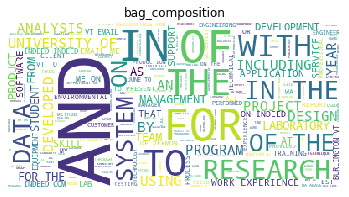

In [304]:
# Generate wordclouds to confirm our data is useful
wordcloud(df2['resume_text'])  

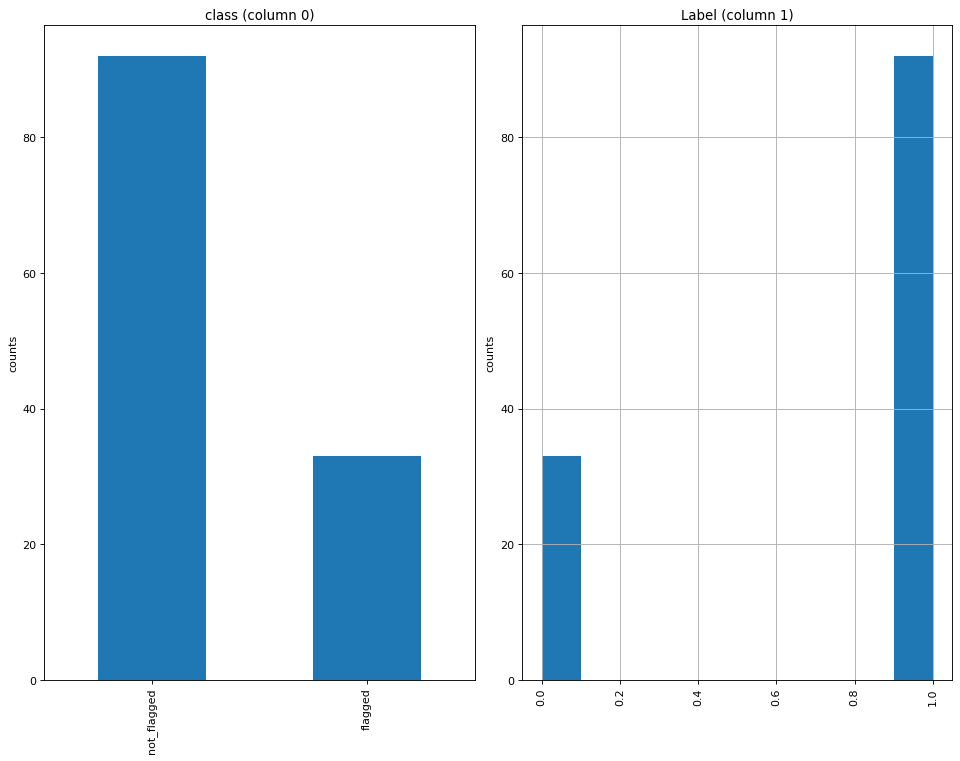

In [291]:
plotPerColumnDistribution(df2, 10, 5)

In [306]:
df2_Text = df2["resume_text"]
len(df2_Text)

125

In [307]:
Tf_idf2 = CountVectorizer(max_features=256).fit_transform(df2_Text.values)

In [312]:
tsne2 = TSNE(
    n_components=3,
    init='random',
    random_state=101,
    method='barnes_hut',
    n_iter=250,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf2.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 125 samples in 0.001s...
[t-SNE] Computed neighbors for 125 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 125 / 125
[t-SNE] Mean sigma: 13.846966
[t-SNE] Computed conditional probabilities in 0.007s
[t-SNE] Iteration 50: error = 99.2283020, gradient norm = 0.2010387 (50 iterations in 0.046s)
[t-SNE] Iteration 100: error = 117.3389740, gradient norm = 0.2111917 (50 iterations in 0.056s)
[t-SNE] Iteration 150: error = 123.3019791, gradient norm = 0.1696569 (50 iterations in 0.036s)
[t-SNE] Iteration 200: error = 128.9076996, gradient norm = 0.1042506 (50 iterations in 0.036s)
[t-SNE] Iteration 250: error = 140.7679596, gradient norm = 0.1576458 (50 iterations in 0.052s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 140.767960
[t-SNE] KL divergence after 251 iterations: 17976931348623157081452742373170435679807056752584499659891747680315726078002853876058955863276687817154045895351

In [313]:
trace2 = go.Scatter3d(
    x = tsne2[:,0],
    y = tsne2[:,1],
    z = tsne2[:,2],
    mode = 'markers',
    marker=dict(
        sizemode = 'diameter',
        color = 'rgb(50,100,92)', #df1_Text.values
        colorscale = 'Portland',
        colorbar = dict(title = 'TExt'),
        line = dict(color = 'rgb(255,255,255)'),
        opacity = 0.60
    )
)

data=[trace2]
layout=dict(height=500, width=500, title='Test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [292]:
import operator
from pprint import pprint

def word_freq_bag(dataframe):

    counts = dict()
    bag = []
    counter = 0
    for line in dataframe:
        # print(line)
        words = line.split()
        # print(words)
        for each in words:
            bag.append(each)
    # print(bag)
    for word in bag:
        # print(word)
        # print(counts.get(word,0))
        counts[bag[counter]] = counts.get(word,0)+1        
        #print(counts)
        counter += 1
        
        # if counter == 50: # if you uncomment the print statements, use break (limited memory)
         #   break 

    key = None
    value = None
    keyvalue = dict() # would like to sort by count, dicts are orderless
    for key in counts:
        value = counts[key]
        keyvalue[key] = value
        # rank in descending order of frequency, get a list of tuples sorted by the second
        # element in each tuple
        valueSort1 = sorted(keyvalue.items(), key=operator.itemgetter(1), reverse = True)
        valueSort0 = sorted(keyvalue.items(), key=operator.itemgetter(0), reverse = False)
    # print(counter) # total number of non-unique words
    # print(len(valueSort1)) # every key has a value
    # print(len(valueSort0)) # so these return the same number
    return(valueSort1, valueSort0, counts) 

    
response_word_freq_bag = word_freq_bag(df2['resume_text'])
# take a look at the words picked out in ascending order of 1st letter 
print(response_word_freq_bag[1])

[('#1', 1), ('#5', 1), ('#5052', 1), ('#5108', 1), ('$.25M', 1), ('$0.5M', 1), ('$1.5M', 1), ('$1.6M', 1), ('$100', 2), ('$1000', 2), ('$100M', 1), ('$1020.00', 1), ('$10B', 1), ('$10M', 1), ('$12', 2), ('$18M', 1), ('$1M', 3), ('$2', 2), ('$20000', 1), ('$20M', 2), ('$24M/year.', 2), ('$250000.', 1), ('$25M', 2), ('$28B', 1), ('$2M', 1), ('$2M/', 1), ('$3000', 1), ('$350K', 1), ('$35M', 1), ('$38M', 1), ('$3M', 1), ('$4.2B', 1), ('$40000', 1), ('$40M+', 2), ('$50', 2), ('$50.', 1), ('$5000', 1), ('$50000', 1), ('$500K', 1), ('$55k', 1), ('$70000', 1), ('$7M', 1), ('&', 192), ("'05-06.", 1), ("'07-08", 1), ("'08", 1), ("'15", 1), ("'Act", 1), ("'Evolutionary", 1), ("'Micro", 1), ("'pitfalls'", 1), ("'plein", 1), ('(', 1), ('(#7521054)', 1), ('(#7703053)', 1), ('(#7816087)', 1), ('(#WO2013126840', 1), ("('R", 1), ('(*equal', 1), ('(+13', 1), ('(.doc', 1), ('(1', 13), ('(1)', 1), ('(1+)', 1), ('(1+);', 1), ('(10+', 36), ('(106%)', 1), ('(106.26%)', 1), ('(11/97-6/01', 1), ('(110', 1), ('

In [293]:
# Print the word frequencies in the bag in descending order. 
print(response_word_freq_bag[0]) # you can confirm with a find (& replace) tool. E.g. R IDE

[('and', 4629), ('to', 2522), ('of', 2430), ('-', 2021), ('the', 1706), ('\x8a\x97¢', 1685), ('in', 1683), ('for', 1381), ('a', 735), ('with', 709), ('on', 637), ('VT', 448), ('as', 354), ('University', 353), ('data', 346), ('*', 308), ('Research', 275), ('by', 238), ('I', 235), ('research', 221), ('at', 214), ('from', 212), ('&', 192), ('including', 185), ('May', 181), ('analysis', 178), ('using', 173), ('all', 172), ('work', 171), ('Vermont', 170), ('June', 166), ('an', 165), ('development', 163), ('2013', 162), ('August', 161), ('new', 151), ('Assistant', 150), ('Science', 149), ('me', 147), ('Burlington', 143), ('Developed', 143), ('2014', 142), ('that', 142), ('EXPERIENCE', 132), ('management', 131), ('College', 128), ('New', 127), ('laboratory', 127), ('software', 126), ('Email', 125), ('Indeed:', 125), ('WORK', 125), ('Present', 125), ('EDUCATION', 123), ('2011', 123), ('Environmental', 120), ('was', 119), ('Engineering', 118), ('o', 114), ('quality', 114), ('2012', 112), ('supp

In [294]:
# This is a little bit of an unconventional training set. The bag of words model does not
# pick out features of individual training examples that caused them to be identified as a
# particular class. Instead, it has an aggregate collection of words from all training examples
# identified as a particular class. It classifieds new examples based on this aggregate.

train_df = df1.sample(frac = 0.5, axis=0)
test_df = df1.sample(frac = 0.5, axis=0)

train_df2 = df2.sample(frac = 0.5, axis=0)
test_df2 = df2.sample(frac = 0.5, axis=0)

train_df_flagged = train_df.loc[train_df['class'] == 'flagged']
train_df_flagged_bag = word_freq_bag(train_df_flagged['response_text'])
print(train_df_flagged_bag[0]) # for example, here you can see the flagged responses' words
train_df_not_flagged = train_df.loc[train_df['class'] == 'not_flagged']
train_df_not_flagged_bag = word_freq_bag(train_df_not_flagged['response_text'])
train_df2_flagged = train_df2.loc[train_df2['class'] == 'flagged']
train_df2_flagged_bag = word_freq_bag(train_df2_flagged['resume_text'])
train_df2_not_flagged = train_df2.loc[train_df2['class'] == 'not_flagged']
train_df_not_flagged.tail() # it's a random sample, so the entries are not ordered, but
# you can see that you are indexing what you want - here's a subset of not_flagged responses
train_df2_not_flagged_bag = word_freq_bag(train_df2_not_flagged['resume_text'])

# You can see printed out first is the number of non-unique words & the number of unique words
# The number of unique words is printed twice, this was to check that each list was the same
# length returned from the word_freq_bag function.
# All good.

[('my', 8), ('and', 8), ('was', 8), ('her', 7), ('a', 6), ('of', 6), ('to', 6), ('friend', 5), ('with', 5), ('him', 5), ('the', 5), ('I', 5), ('his', 4), ('in', 4), ('out', 3), ('tried', 3), ('she', 3), ('through', 2), ('dealing', 2), ('alcoholic', 2), ('up', 2), ('while', 2), ('he', 2), ('when', 2), ('best', 2), ('for', 2), ('Helping', 1), ('mother.', 1), ('Cleaning', 1), ("friend's", 1), ('campsite', 1), ('slightly', 1), ('helping', 1), ('living', 1), ('all', 1), ('summer', 1), ('as', 1), ('an', 1), ('Mt.', 1), ('Hood', 1), ('woods.', 1), ('On', 1), ('memorial', 1), ('anniversary', 1), ('friends', 1), ('father', 1), ('give', 1), ('support', 1), ('remind', 1), ('that', 1), ("he's", 1), ('not', 1), ('alone.', 1), ('ex', 1), ('gf', 1), ('cutter/suicidal,', 1), ('got', 1), ('own', 1), ('issues', 1), ('slowly', 1), ('dying', 1), ('inside.', 1), ('Roommate', 1), ('going', 1), ('death', 1), ('loss', 1), ('gf.', 1), ('Did', 1), ('anything', 1), ('get', 1), ('bedroom.', 1), ('Had', 1), ('open

In [295]:
# You can use the print statements in this code below here to get a clearer picture.

# to convert a string to a dataframe with pandas, in order to reuse word_freq_bag from above
import io
import sys

# mydict1={'response:2,'response2:2,'response6':2,'response8':1}
# mydict2={'response':1,'response2':5,'response8':7}
# mykey=[sum(value * mydict1[key] for key,value in mydict2.items())]
# print(mykey)

def score(a, b):
    mykey=[sum(value * a.get(key,0) for key,value in b.items())]
    # print(b.items())
    # print(a)
    # print(b)
    # global score_counter
    # score_counter += 1
    # if score_counter == 10: # to limit memory so you can run without needing to restart
    #     sys.exit()
    return(mykey)

def classifier_accuracy(text_type, text_id, test_dataframe, train_dataframe_flagged,
                        train_dataframe_flagged_bag, 
                        train_dataframe_not_flagged_bag, length):
    counter = 0
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0
    random_guess = 1-len(train_dataframe_flagged)/length
    test_dataframe_flagged = test_dataframe.loc[test_dataframe['class'] == 'flagged']
    positive_text = len(test_dataframe_flagged)
    print(positive_text)
    test_dataframe_not_flagged = test_dataframe.loc[test_dataframe['class'] == 'not_flagged']
    negative_text = len(test_dataframe_not_flagged)
    print(negative_text)
    
    # print(train_dataframe_flagged_bag[2])
    for i in test_dataframe[text_id]:
        split_char = i.split('_') # get id from resume_id
        integer = int(float(split_char[1])) -1 # acess by index, one less that resume_id
        text_class = test_dataframe['class'][integer]
        # print(text_class)
        # print(text_class)
        text = test_dataframe[text_type][integer]
        # convert string to dataframe, make more than wide enough for the text column
        df3 = pd.read_fwf(io.StringIO(text), header=None, widths=[1000000], names=[text_type])
        # df3 # if you want to see the dataframe for the response/resume
        text_bag = word_freq_bag(df3[text_type]) 
        # print(text_bag[2])
        # print("ok, here goes:")
        
        
        score_flagged = score(text_bag[2], train_dataframe_flagged_bag[2]) # 2 is counts dict
        #print(score_flagged)
        score_not_flagged = score(text_bag[2], train_dataframe_not_flagged_bag[2])
        #print(score_not_flagged)
        if score_flagged > score_not_flagged and text_class == 'flagged':
            counter += 1
            true_positive += 1
        elif score_flagged <= score_not_flagged and text_class == 'not_flagged':
            counter += 1
            true_negative += 1
        elif score_flagged > score_not_flagged and text_class == 'not_flagged':
            counter += 0
            false_positive += 1
        elif score_flagged <= score_not_flagged and text_class == 'flagged':
            counter += 0
            false_negative += 1
    return('number of test examples: ' + str(length), 'correct identifications: ' + str(counter), 'pick_randomly_performace: ' + str(random_guess), 'model_performance: ' + str(counter/length), 'false negatives: ' + str((positive_text-false_negative)/positive_text), 'false positives: ' + str((positive_text-true_positive)/positive_text), 'false positive count: ' + str(false_positive) , 'false negative count: ' + str(false_negative))

score_counter = 0
print(classifier_accuracy('response_text', 'response_id', test_df, train_df_flagged, train_df_flagged_bag, train_df_not_flagged_bag, 40))
print(classifier_accuracy('resume_text', 'resume_id', test_df2, train_df2_flagged, train_df2_flagged_bag, train_df2_not_flagged_bag, 62))

9
31
('number of test examples: 40', 'correct identifications: 31', 'pick_randomly_performace: 0.75', 'model_performance: 0.775', 'false negatives: 0.0', 'false positives: 1.0', 'false positive count: 0', 'false negative count: 9')
14
48
('number of test examples: 62', 'correct identifications: 48', 'pick_randomly_performace: 0.7096774193548387', 'model_performance: 0.7741935483870968', 'false negatives: 0.0', 'false positives: 1.0', 'false positive count: 0', 'false negative count: 14')
